In [1]:
import os.path as path_

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = 'data'
submits_path = 'submits'
seed = 110894

In [64]:
df_data = pd.read_csv(path_.join(data_path, 'HW_6_data.csv'))
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dates          3242 non-null   object 
 1   SKU            3242 non-null   int64  
 2   price_per_sku  3242 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.1+ KB


In [65]:
df_data['dates'] = pd.to_datetime(df_data['dates'])

In [66]:
df_data['SKU'].nunique()

10

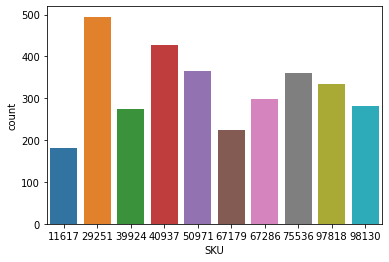

In [67]:
sns.countplot(x='SKU', data=df_data)

In [124]:
df_data['year'] = df_data['dates'].dt.year
df_data['month'] = df_data['dates'].dt.month
df_data['week_num'] = df_data['dates'].dt.week
df_data['year_month'] = (
    df_data['year'].apply(lambda x: f"{x:04d}")
    + '-'
    + df_data['month'].apply(lambda x: f"{x:02d}")
)
df_data['year_week'] = (
    df_data['year'].apply(lambda x: f"{x:04d}")
    + '-'
    + df_data['week_num'].apply(lambda x: f"{x:02d}")
)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


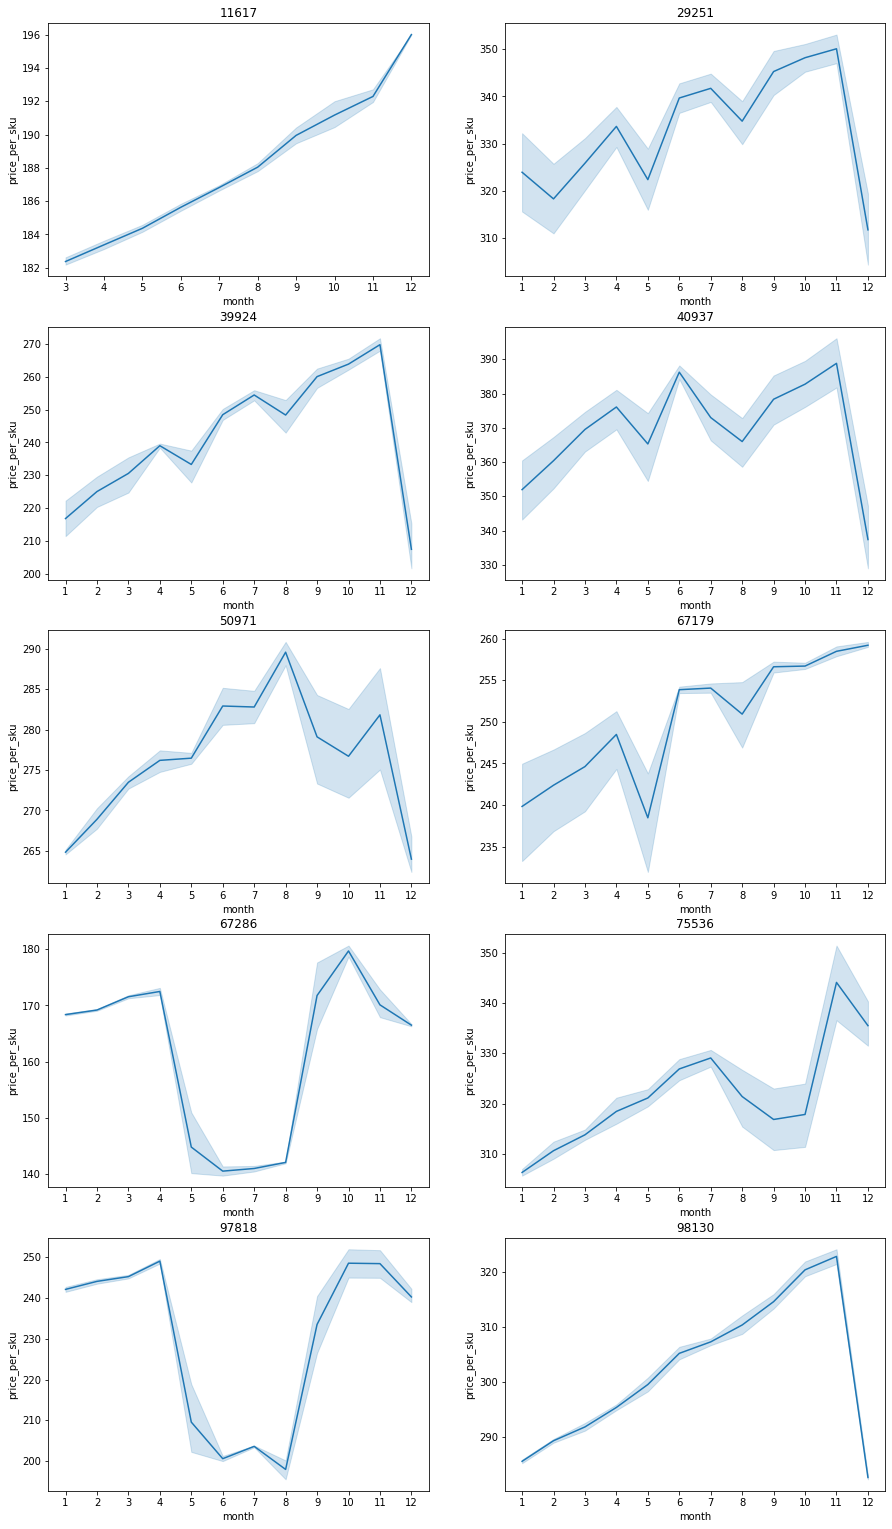

In [125]:
fig, axs = plt.subplots(5, 2, figsize=(15, 27))
skus = df_data['SKU'].unique()
for i, ax in enumerate(axs.reshape(-1)):
    ax.set_title(skus[i])
    ax.set_xticks(range(1, 13))
    sns.lineplot(
        x='month',
        y='price_per_sku',
        data=df_data[df_data['SKU'] == skus[i]],
        ax=ax,
    )

In [126]:
list_season_type2 = [67286, 97818]

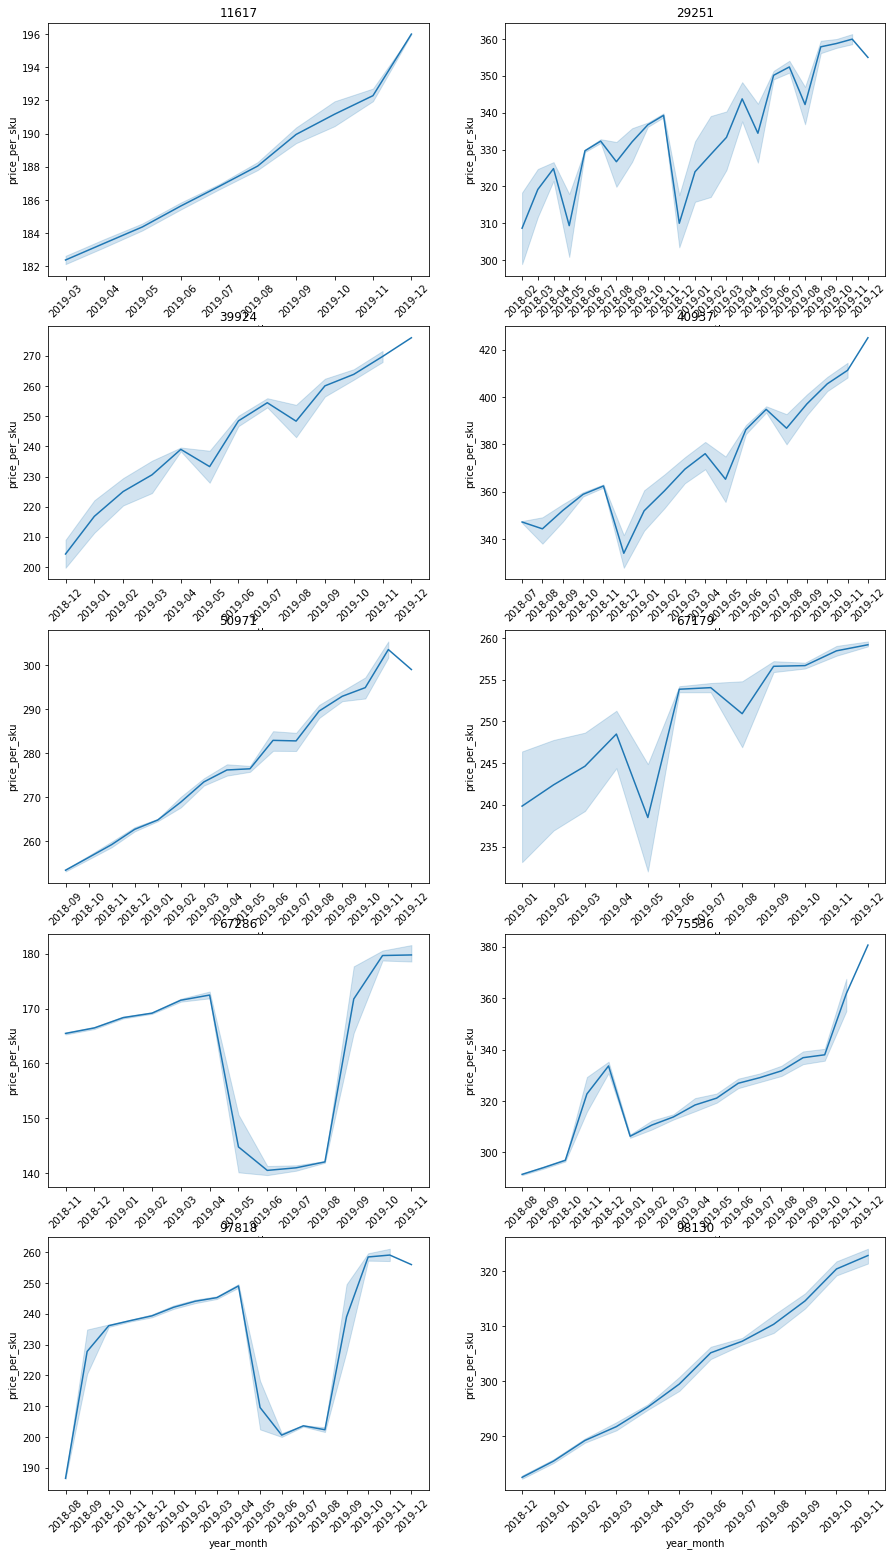

In [127]:
fig, axs = plt.subplots(5, 2, figsize=(15, 27))
skus = df_data['SKU'].unique()
for i, ax in enumerate(axs.reshape(-1)):
    ax.set_title(skus[i])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    sns.lineplot(
        x='year_month',
        y='price_per_sku',
        data=df_data[df_data['SKU'] == skus[i]].sort_values('year_month'),
        ax=ax,
    )

In [128]:
list_season_type3 = [75536]

In [146]:
list_season_type1 = [sku for sku in skus if sku not in list_season_type2 and sku not in list_season_type3]
list_season_type1

[11617, 29251, 39924, 40937, 50971, 67179, 98130]

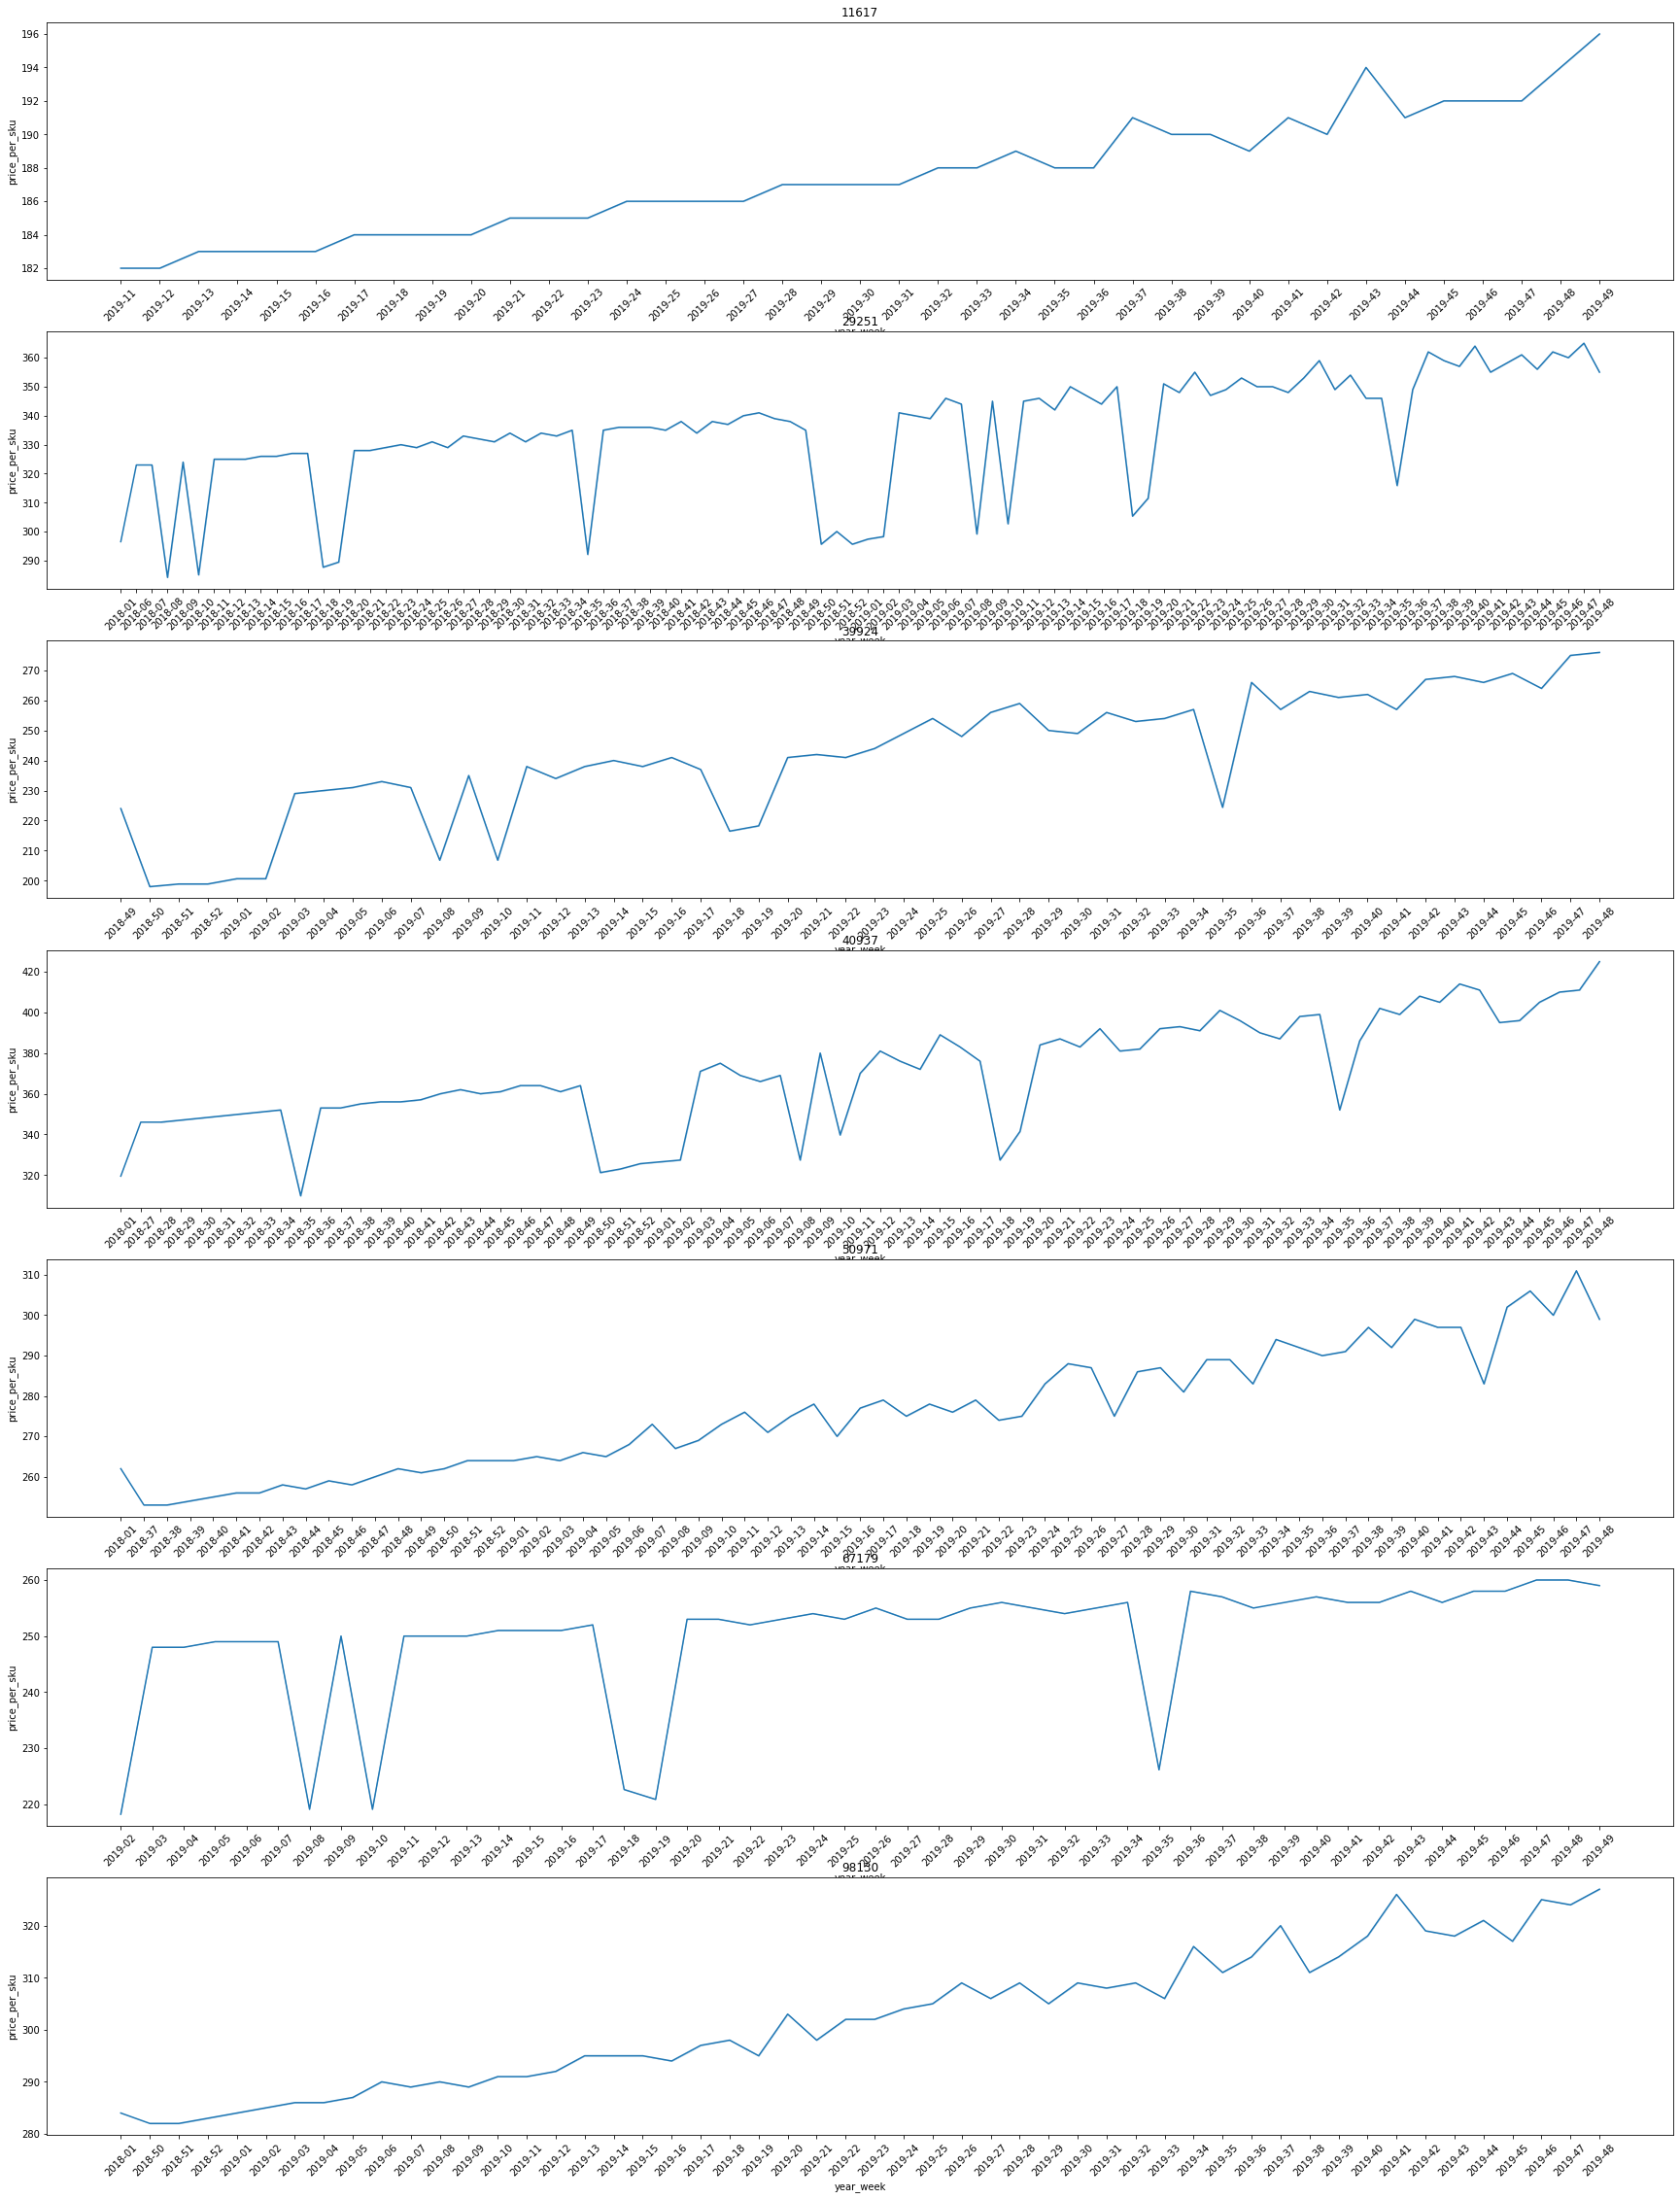

In [133]:
fig, axs = plt.subplots(7, 1, figsize=(30, 40))
for i, ax in enumerate(axs.reshape(-1)):
    ax.set_title(list_season_type1[i])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    sns.lineplot(
        x='year_week',
        y='price_per_sku',
        data=df_data[df_data['SKU'] == list_season_type1[i]].sort_values('year_week'),
        ax=ax,
    )

In [147]:
list_season_type1.remove(11617)
list_season_type1.remove(39924)
list_season_type1.remove(50971)
list_season_type1.remove(98130)

In [148]:
with open(path_.join(submits_path, 'part1.txt'), mode='w') as file:
    for l in [list_season_type1, list_season_type2, list_season_type3]:
        file.write(', '.join([str(i) for i in l]) + '\n')